In [2]:
#!python /c/repos/ReX/ReX/rex.py /c/repos/Explainable-AI/ReX/cat_1.png -c --model /c/repos/Explainable-AI/ReX/my_model.h5

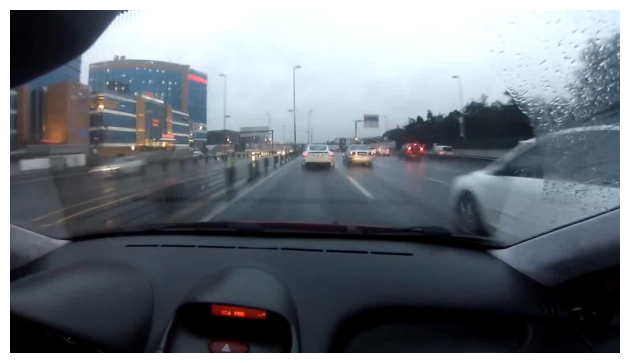

In [3]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

path_to_image = "car/car-2/img/00000001.jpg";
img = cv2.imread(path_to_image)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')
plt.tight_layout()
plt.show()


0: 384x640 7 cars, 231.3ms
Speed: 5.0ms preprocess, 231.3ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


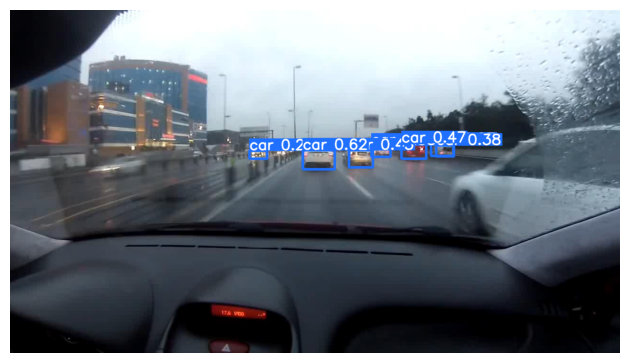

In [4]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

results = model.predict(img)

img_result_1 = results[0].plot()
img_result = cv2.cvtColor(img_result_1, cv2.COLOR_RGB2BGR)
cv2.imwrite('asd.jpg', img_result)
plt.imshow(img_result_1)
plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
from os import listdir
from os.path import isfile, join

folder = 'car/'
sub_sub_folder = 'img/'
for i in range(1, 20):
    sub_folder = f'car-{i}/'
    path = f'{folder}{sub_folder}{sub_sub_folder}'
    image_files = [f for f in listdir(path) if isfile(join(path, f)) and f.endswith('.jpg')]
    for image_full_path in image_files:
        img = cv2.imread(f'{path}{image_full_path}')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        results = model.predict(img)
        img_result = results[0].plot()
        img_result = cv2.cvtColor(img_result, cv2.COLOR_RGB2BGR)
        cv2.imwrite(f'car-yolo-results/car-{i}/{image_full_path}', img_result)
        break
    break


0: 384x640 5 cars, 2 traffic lights, 171.6ms
Speed: 4.0ms preprocess, 171.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


: 